In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import base64
import requests
import json 

In [31]:
def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')
    
def get_base64_encoded_arr(arr):
    return base64.b64encode(np.reshape(arr, (480*640*3))).decode('utf-8')

def get_play_action(endpoint, n_cards, hand, deck, key=None):
    input_json = json.dumps({
        "n_cards": n_cards,
        "hand": get_base64_encoded_arr(hand),
        "deck": get_base64_encoded_arr(deck)
    })
    headers = { 'Content-Type':'application/json' }
    if key:
        headers['Authorization'] = f'Bearer {key}' # Only difference to local is to send the auth key
    predictions = requests.post(endpoint, input_json, headers = headers)
    p = predictions.json()
    print(str(p)+'\n')
    print(f'Hand:     {p[0]}')
    print(f'Deck:     {p[1]}')
    if p[2]:
        play = p[2][0]
        print(f'Score:    {play[0]}')
        print(f'Complete: {play[1]}')
        print(f'Words:    {[c[0] for c in play[2]]}')
        print(f'Pick up:  {p[2][1]}')
        print(f'Drop:     {p[2][2]}\n')
    else:
        print('No possible play for these cards')

In [22]:
def get_frame():
    for i in range(5): # grab a few frames to clear the buffer
        ret, frame = cap.read()
    frame = np.fliplr(np.flipud(frame))
    frame = frame[..., ::-1].copy()
    plt.imshow(frame)
    return frame

In [37]:
endpoint = 'http://localhost:32777/score'

In [ ]:
cap = cv2.VideoCapture(2)

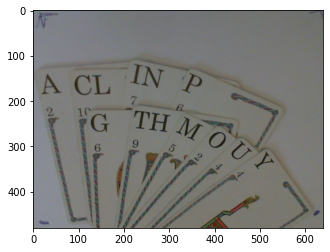

In [34]:
hand = get_frame()

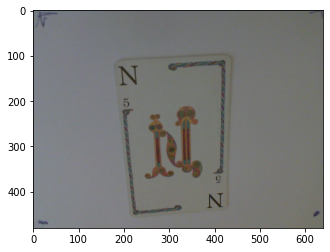

In [25]:
deck = get_frame()

In [38]:
get_play_action(endpoint, 10, hand, deck)

['a/cl/g/in/th/m/p/o/u/y', 'n', [[58, True, [['cl/o/th', [21, 3, ['cl', 'o', 'th']]], ['m/u/n/g', [20, 4, ['m', 'u', 'n', 'g']]], ['p/in/y', [17, 3, ['p', 'in', 'y']]]]], 'n', 'a']]

Hand:     a/cl/g/in/th/m/p/o/u/y
Deck:     n
Score:    58
Complete: True
Words:    ['cl/o/th', 'm/u/n/g', 'p/in/y']
Pick up:  n
Drop:     a



In [36]:
cap.release()